# 3. 乱数の変換方法

一様乱数から様々な分布の乱数を作り出す方法を学ぶ。

## 区間一様乱数

Julia の場合は、`Random.rand()` の引数に指定すれば特定区間の一様乱数を得られるが、一般には**逆関数法**が用いられる。下図 a のようになる確率密度関数を積分した分布関数は b に用になるので、ここに区間 `[0, 1)` の一様乱数を代入すると、区間 `[a, b)` の乱数が得られる。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig4-1-11.jpg)

区間 `[a, b)` の一様乱数の分布関数 `g(x)` は次のように表される：

$$
    g(x) = 
    \begin{cases}
        0           &   x < a  \\
        (x-a)/(b-a) &   a \leqq x < b \\
        1           &   x > b
    \end{cases}
$$

これを $x$ について解くと、

$$
    x = a+(b-a)\cdot g(x)
$$

となる。実際のプログラム上では `x = a + (b-a) * rand()` と書ける。

## 指数乱数

ランダムに発生する事象の時間間隔を測ってみると、それは指数分布に従う。後に述べる、変化点方式と呼ばれるシミュレーションを行う場合、指数分布にしたがう乱数、すなわち指数乱数をよく用いる。

指数分布の密度関数 $f(\tau)$ は、平均を $\lambda$ とすると、

$$
    f(\tau) = \lambda e^{-\lambda\tau}
$$

であり、分布関数 $g(\tau)$ は

$$
    g(\tau) = \int_{-\infty}^{\tau}\lambda e^{-\lambda\tau} d\tau \\
            = 1 - e^{-\lambda\tau}
$$

である。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig4-2-11.jpg)

逆関数法で指数乱数を発生させるため、逆関数は

$$
    \tau = -\frac{1}{\lambda}\log(1-g(\tau))
$$

となる。$g(\tau))$ を `Random.rand()` に書き換えれば、$\tau$ は指数乱数となる。

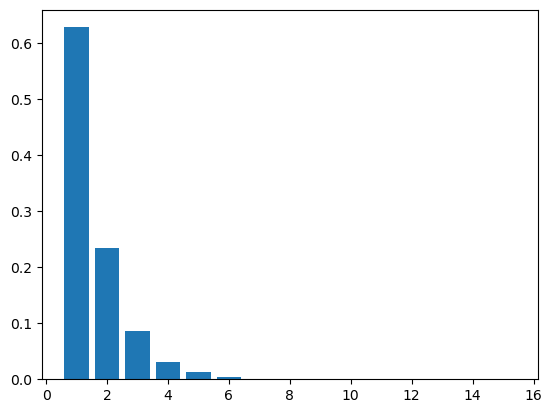

(PyObject <matplotlib.patches.Rectangle object at 0x7f8110298250>, PyObject <matplotlib.patches.Rectangle object at 0x7f81102980d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110298760>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110298a30>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110298d00>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110298fd0>, PyObject <matplotlib.patches.Rectangle object at 0x7f81102aa2e0>, PyObject <matplotlib.patches.Rectangle object at 0x7f81102aa5b0>, PyObject <matplotlib.patches.Rectangle object at 0x7f81102aa880>, PyObject <matplotlib.patches.Rectangle object at 0x7f81102aab50>, PyObject <matplotlib.patches.Rectangle object at 0x7f81102aae20>, PyObject <matplotlib.patches.Rectangle object at 0x7f81102ba130>, PyObject <matplotlib.patches.Rectangle object at 0x7f81102ba400>, PyObject <matplotlib.patches.Rectangle object at 0x7f81102ba6d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f81102ba9a0>)

In [1]:
using Random
using PyPlot

number = 10000
lambda = 1.0
size = 15      # 図で描画する最大数
f = zeros(Int, size)

for j = 1:number
    tau = -1.0/lambda * log(1.0-rand())
    u = Int(ceil(tau))
    f[u] += 1
end

x = 1:size
bar(x, f[1:size] / number)

## ポアソン乱数

客の到着時間間隔 $t$ の確率密度が

$$
    f(t) = \lambda e^{-\lambda t}
$$

に従うということと、時間間隔 $t$ 内に $k$ 人の客が到着する確率が

$$
    p(k) = \frac{(\lambda t)^k}{k!}e^{-\lambda t}
$$

であることが同等であることを利用する。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig4-3-1.jpg)

上の図のように指数分布乱数 $t_1, t_2, t3,$…を次々に発生させ、その総和が1を超えるまでの $k$ をカウントすれば、その $k$ が求めるポアソン分布乱数となる。すなわち、

$$
    p(k) = \frac{(\lambda t)^k}{k!}e^{-\lambda t}
$$

となる最小の $k$ を求める。

指数乱数 $t_n$ は一様乱数列 $r_n$ から

$$
    t_n = -\frac{1}{\lambda}\log(1-r_n)
$$

と求めることが出来る。$\log$ の計算は時間がかかるので、

$$
    \sum_{n=0}^{k} -\frac{1}{\lambda}\log(1-r_n) \geqq 1
$$

において、指数関数と対数関数の関係から、

$$
    e^{-\lambda} \geqq \prod_{n=0}^{k}(1-r_n)
$$

のとおり変形し、これを満たす最小の $k$ を求める。

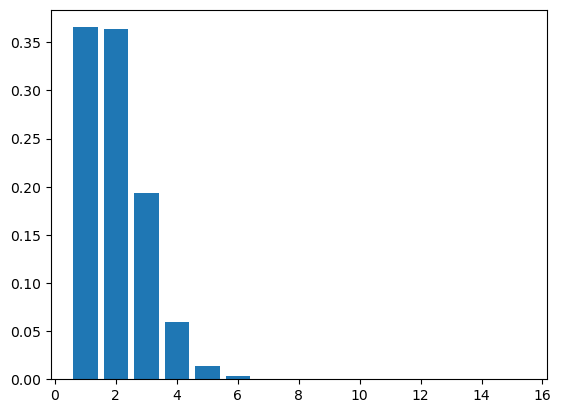

(PyObject <matplotlib.patches.Rectangle object at 0x7f811081cb20>, PyObject <matplotlib.patches.Rectangle object at 0x7f811081c9a0>, PyObject <matplotlib.patches.Rectangle object at 0x7f811082b040>, PyObject <matplotlib.patches.Rectangle object at 0x7f811082b310>, PyObject <matplotlib.patches.Rectangle object at 0x7f811082b5e0>, PyObject <matplotlib.patches.Rectangle object at 0x7f811082b8b0>, PyObject <matplotlib.patches.Rectangle object at 0x7f811082bb80>, PyObject <matplotlib.patches.Rectangle object at 0x7f811082be50>, PyObject <matplotlib.patches.Rectangle object at 0x7f810dcd4160>, PyObject <matplotlib.patches.Rectangle object at 0x7f810dcd4430>, PyObject <matplotlib.patches.Rectangle object at 0x7f810dcd4700>, PyObject <matplotlib.patches.Rectangle object at 0x7f810dcd49d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f810dcd4ca0>, PyObject <matplotlib.patches.Rectangle object at 0x7f810dcd4f70>, PyObject <matplotlib.patches.Rectangle object at 0x7f810dce2280>)

In [2]:
using Random
using PyPlot

number = 10000
lambda = 1.0
size = 15      # 図で描画する最大数
f = zeros(Int, number)

"""
ポアソン乱数の発生
"""
function poisson(lambda::Float64)::Int
    k = 0
    xp = rand()
    while (xp >= exp(-lambda))
        xp *= rand()
        k += 1
    end
    
    return k
end

for j = 1:number
    k = poisson(lambda)
    f[k+1] += 1
end

x = 1:size
bar(x, f[1:size] / number)

## アーラン分布

現実のデータを見ると、到着間隔やサービス時間が完全にランダムではなく、前の到着に影響を受け、指数分布に従わないことがある。そのような場合、アーラン分布が用いられる。

$r_1, r_2, r_3,･･･r_k$　が互いに独立で、ともに平均が $k\cdot\lambda$ の指数分布に従うとする。そのとき、

$$
    x_k = r_1 + r_2 + r_3 + … + r_k
$$

の分布を**位相 $k$ のアーラン分布**という。ア－ラン分布は、下図のとおり、ポアソン到着で $k$　番目ごとの到着のみを着目したとき、その分布に相当する。$k=1$ の場合、指数分布に一致する。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig4-4-1.jpg)

位相 $k$ のア－ラン分布の乱数 $\tau$ を発生させるには、平均 $1/(k\lambda)$ の指数分布を $k$ 個発生させ、その和を $\tau$ とすれば良い。従って、

$$
    \tau = \sum_{n-1}^{k}\tau_n = -\frac{1}{k\lambda}\sum_{n=1}^{k}\log(1-r_n) \\
         = -\frac{1}{k\lambda}\left(\log\prod_{n=1}^{k}(1-r_n)\right)
$$

のようにすれば、$\log$ の計算を1回で済ませられる。

下記計算結果から分かる通り、$k$ が大きくなると、中心極限定理にしたがい正規分布に近づく。指数分布のような極端な非対象の分布でも、たくさん集まれば、正規分布になる。

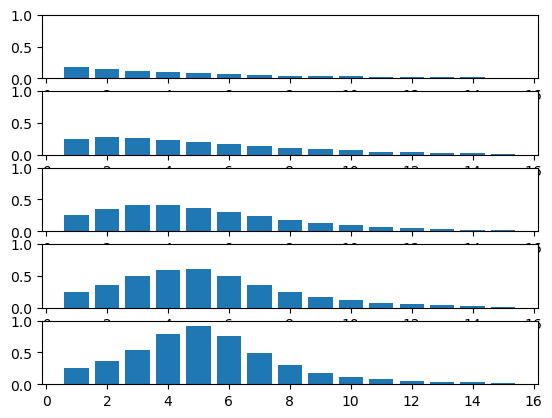

In [3]:
using Random
using PyPlot

number = 10000
lambda = 1.0
size = 15               # 図で描画する最大数
kizami = 0.2            # この値ごとに区切ってヒストグラムに入れる
f = zeros(Int, number)
k = 1

"""
アーラン乱数の発生
"""
function erlang(lambda::Float64, k::Int)::Float64
    tp = 1.0
    for n = 1:k
        tp *= (1-rand())
    end
    tau = -1.0 / (lambda * k) * log(tp)
    return tau
end

fig = PyPlot.figure()

for i = 1:5    
    for j = 1:number
        u = Int(ceil(erlang(lambda, k) / kizami))
        f[u] += 1
    end
    ax = fig.add_subplot(5, 1, i)
    x = 1:size
    ax.bar(x, f[1:size] / number)
    ax.set_ylim(0, 1)
    k *= 2
end

## 正規乱数

平均 $\mu$, 標準偏差 $\sigma$ の正規分布の確率密度関数は

$$
    f(x) = \frac{1}{\sigma\sqrt{2\pi}}-\frac{1}{2}\exp\left(\left(\frac{x-\mu}{\sigma}\right)^2\right)
$$

で与えられ、$\mu=0, \sigma=1$ の値を持つ場合を**標準正規分布**と呼び、

$$
    f(x)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right)
$$

で示される。

$$
    z = \frac{x-\mu}{\sigma}
$$

とおくと、一般の正規分布は標準化された分布に変換できる。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig4-5-1.jpg)

### 中心極限定理による正規乱数

任意の平均と標準偏差を持つ正規分布乱数（正規乱数）を作るには、中心極限定理を用いる。中心極限定理によれば、一様乱数 $r_i$ を $n$ 個合計したものの分布は、平均値が $n/2$, 分散が $n/12$ の正規分布に近くなる。従って、

$$
    z = \sqrt{\frac{12}{n}}\left(\sum_{i=1}^{n}r_i - \frac{n}{2}\right)
$$

とおけば、 $z$ の分布は標準正規分布となる。

さらに、任意の平均値 $EX$, 標準偏差 $SD$ を持つ正規分布は

$$
    x = SD\times \sqrt{\frac{12}{n}}\left(\sum_{i=1}^{n}r_i - \frac{n}{2}\right) + EX
$$

のように変換することにより得られる。

「中心極限定理の実験」の結果より、8 個の一様乱数を加え合わせると、その分布は十分に正規分布に近いことが確かめられるので、上の式で $n=12$ とすれば、平方根の計算をせずに済む。すなわち、

$$
    x = SD\times\left(\sum_{i=1}^{12}r_i -6\right) +EX
$$

として、正規乱数を作ることが出来る。

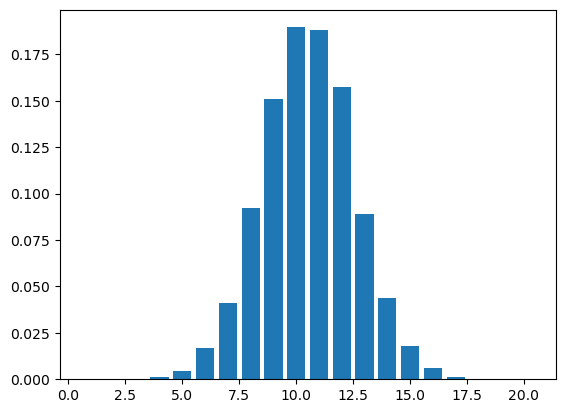

(PyObject <matplotlib.patches.Rectangle object at 0x7f8110d28880>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d28700>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d28d60>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d36070>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d36340>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d36610>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d368e0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d36bb0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d36e80>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110e29190>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110e29460>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110e29730>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110e29a00>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110e29cd0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110e29fa0>, PyObject 

In [4]:
using Random
using PyPlot

number = 10000
size = 20               # 図で描画する最大数
kizami = 0.2            # この値ごとに区切ってヒストグラムに入れる
ex = 10.0               # 平均値
sd = 2.0                # 標準偏差

f = zeros(Int, number)
k = 1

"""
正規乱数の発生
"""
function normal(ex::Float64, sd::Float64)::Float64
    xw = 0.0
    for n = 1:12
        xw += rand()
    end
    x = sd * (xw - 6.0) + ex
    return x
end

for j = 1:number
    u = Int(ceil(normal(ex, sd)))
    if u >= 0
        f[u] += 1
    end
end

x = 1:size
bar(x, f[1:size] / number)

## 任意の分布乱数を作る

理論分布が分からずとも、ある現象の統計をとったときの度数分布が分かっている場合、その分布に従った乱数を発生させい、再現実験をすることが出来る。以下の様のような度数分布 $f(x)$ が与えられたとき、累積分布関数 $g(i)$ に逆関数法を用いて一様乱数を代入することにより分布乱数を発生させる。

|$x$|$i$|$f(x)$|$g(i)$|
|---|---|---|---|
|0.1|1|0.02|0.02|
|0.2|2|0.36|0.38|
|0.3|3|0.34|0.72|
|0.4|4|0.13|0.85|
|0.5|5|0.07|0.92|
|0.6|6|0.03|0.95|
|0.7|7|0.02|0.97|
|0.8|8|0.01|0.98|
|0.9|9|0.01|0.99|
|1.0|10|0.01|1.00|

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig4-6-1.jpg)

$x$ のキザミ幅を $x_0$ とし、キザミの番号を $i$ としたとき（$i=1$ から $k$）、累積分布を表のように $g(i)$ とする。プログラム上では、表の値を`g[i]` に代入する。任意分布乱数発生の関数で、`Random.rand()`により乱数 `r` を発生させ、`g[i]` の配列を `i` の小さい方から見ていき、 `g[i] > r` となったら、その `r` と `i` により、

$$
    x = \frac{r-g(i-1)}{g(i)-g(i-1)}\times x_0 + (i-1)\times x_0
$$

として、 $x$ を求める。

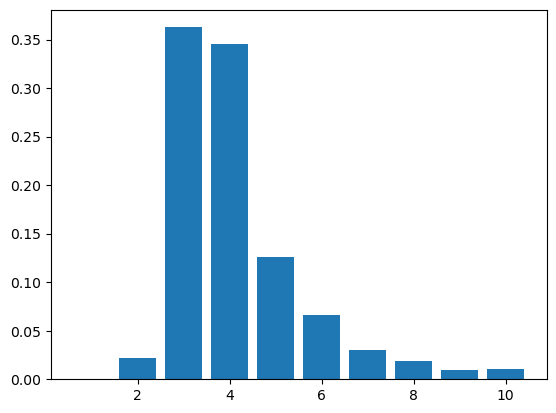

(PyObject <matplotlib.patches.Rectangle object at 0x7f8110e9cdc0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110e9cc40>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d482e0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d485b0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d48880>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d48b50>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d48e20>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d58130>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d58400>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110d586d0>)

In [5]:
using Random
using PyPlot

number = 10000
size = 10               # 図で描画する最大数
f = zeros(Int, number)
g = [0.0,0.02,0.38,0.72,0.85,0.92,0.95,0.97,0.98,0.99,1.0]

function general(g::Array{Float64})::Float64
    x0 = 1.0 / size
    r = rand()
    i = 1
    
    while(g[i] < r) 
        i += 1
    end
    x = (r - g[i-1]) / (g[i] - g[i-1]) * x0 + (i - 1) * x0
    return x
end

for j = 1:number
    u = Int(ceil(general(g) * size))
    if u >= 1
        f[u] += 1
    end
end

x = 1:size
bar(x, f[1:size] / number)

## 演習問題

1. 区間 $[0, 1)$ の２つの乱数 $r_1$, $r_2$ を発生させ、
$$
    x_1 = \sqrt{-2\log r_1}\cos 2\pi r_2 \\
    x_2 = \sqrt{-2\log r_1}\sin 2\pi r_2
$$
  とすれば、$x_1$, $x_2$ は互いに独立な標準正規乱数となる。これを用い、平均 $EX$、標準偏差 $SD$ の正規乱数を発生するプログラムを作りなさい。
  
2. 「２個のサイコロの目 の合計は、2 から 12 までに分布するが、7 の場合の確率が最も高い（この場合三角分布となる）」というように、2 つの一様乱数の和の分布が、平均 1 の三角分布となることを用いて、任意の三角分布乱数を発生するプログラムをつくれ。

### 演習問題 1 解答

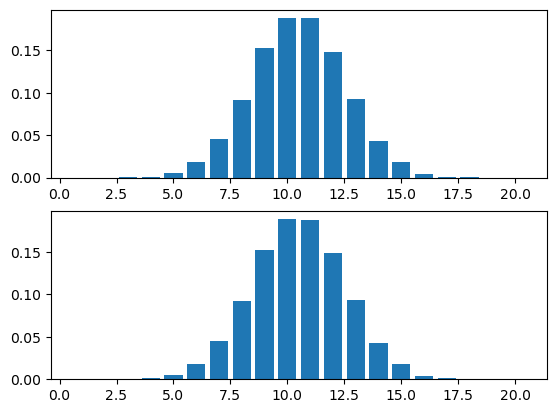

(PyObject <matplotlib.patches.Rectangle object at 0x7f8110ec7070>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110eb9eb0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ec7550>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ec7820>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ec7af0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ec7dc0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ed50d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ed53a0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ed5670>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ed5940>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ed5c10>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ed5ee0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ee31f0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ee34c0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110ee3790>, PyObject 

In [6]:
using Random
using PyPlot

number = 10000
size = 20               # 図で描画する最大数
ex = 10.0
sd = 2.0
f = zeros(Int, number)
g = zeros(Int, number)

function normal1(ex::Float64, sd::Float64)::Float64
    xw = sqrt(-2.0 * log(rand())) * cos( 2.0 * π * rand())
    x = sd * xw + ex
end

function normal2(ex::Float64, sd::Float64)::Float64
    xw = sqrt(-2.0 * log(rand())) * sin( 2.0 * π * rand())
    x = sd * xw + ex
end

for j = 1:number
    u = Int(ceil(normal1(ex, sd)))
    v = Int(ceil(normal2(ex, sd)))
    if u >= 0
        f[u] += 1
    end
    if v >= 0
        g[v] += 1
    end
end

fig = PyPlot.figure()
x = 1:size

ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(x, f[x] / number)

ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(x, f[x] / number)

### 演習 2 解答

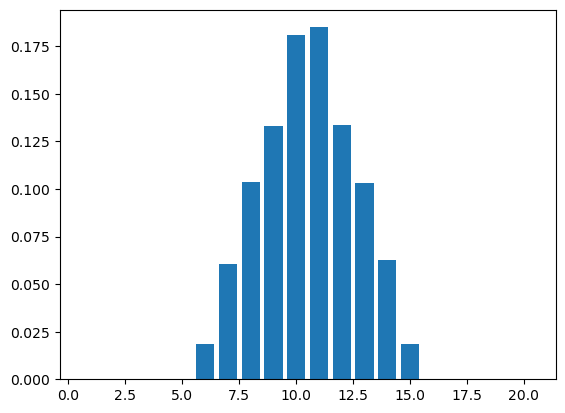

(PyObject <matplotlib.patches.Rectangle object at 0x7f810d8e4fd0>, PyObject <matplotlib.patches.Rectangle object at 0x7f810d8e4280>, PyObject <matplotlib.patches.Rectangle object at 0x7f810d8ef940>, PyObject <matplotlib.patches.Rectangle object at 0x7f810d8efbe0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110843ac0>, PyObject <matplotlib.patches.Rectangle object at 0x7f811087fb80>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110895be0>, PyObject <matplotlib.patches.Rectangle object at 0x7f811088a640>, PyObject <matplotlib.patches.Rectangle object at 0x7f811088a9d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f811088cca0>, PyObject <matplotlib.patches.Rectangle object at 0x7f81108a1c40>, PyObject <matplotlib.patches.Rectangle object at 0x7f81108dc8b0>, PyObject <matplotlib.patches.Rectangle object at 0x7f8110bcea30>, PyObject <matplotlib.patches.Rectangle object at 0x7f81108e6550>, PyObject <matplotlib.patches.Rectangle object at 0x7f81108e6730>, PyObject 

In [7]:
using Random
using PyPlot

number = 10000
size = 20               # 図で描画する最大数
a = 5.0                 # 三角分布の下限
b = 15.0                # 三角分布の上限
f = zeros(Int, number)

for j = 1:number
    x = (b + a) / 2.0 + ((rand() + rand()) - 1.0) * (b - a) / 2.0
    u = Int(ceil(x))
    f[u] += 1
end

x = 1:size
bar(x, f[x] / number)